##**Name: Sharmin Islam Shroddha; ID - 2421194**

For the Final Assignment you will consider the **AMEO - Aspiring Minds' Employment Outcomes 2015 dataset**. You can download it from https://zenodo.org/records/45735..  

The dataset contains various information about a set of engineering candidates and their employment outcomes in India. For every candidate, the data contains both the profile information along with their employment outcome information.
Candidate Profile Information include:

1.   Scores on Aspiring Minds’ AMCAT – a standardized test of job skills. The test includes cognitive, domain and personality assessments
2.   Personal information like gender, date of birth, etc.
3. Pre-university information like high school grades, high school location
4. University information like GPA, college major, college reputation proxy
5. Demographic information like location of college, candidates’ permanent location.

Employment Outcome Information include:


1. First job annual salary
2. First job title
3. First job location

This is the only data set where we have employment outcomes together with scores on a standardized job test, which makes this very unique. Other such data sets either do not test scores at all or scores on pre-university tests.

**Your Task**

Your task is to construct machine learning models (using Scikit Learn) to predict the annual job salary.
You should compare a couple of models that you prefer and use as features only the ones that seem relevant ones. The model(s) should be trained on the training data and you should report the performance of the model on the test data.
You should check for missing data and other anomalies in the dataset.
*Bonus credits will be given if you can report which features are the best predictors of the First job annual salary.*

***Follow this notebook step by step to complete your assignment.***

#### **Import Libraries**

Import libraries that will be used in this notebook.


In [181]:
import os
import google.colab
import time
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### **Load Data**

Load the training dataset downloaded from [zenodo](https://zenodo.org/records/45735) and display the first few rows, and list the columns.


In [182]:
# mounting Google Drive in the runtime's virtual machine

if not os.path.isdir('/content/drive'):

    google.colab.drive.mount('/content/drive')

In [183]:
def read_file(path):
    df = None
    if path.split('.')[-1] == 'xlsx':
        df = pd.read_excel(path)
    return df

def view_col_name(df):
    print("Column Names:")
    for idx, col_name in enumerate(df.columns):
      print(f"{idx + 1}. {col_name}")

In [184]:
train_file_path = '/content/drive/MyDrive/AI_final_assignment_dataset/train.xlsx'

train_df = read_file(train_file_path)

print('Shape of the {0} datset: {1}'.format(train_file_path.split('/')[-1], train_df.shape))
print()
view_col_name(train_df) # list of columns
print()
train_df.head() # first few rows of the dataset

Shape of the train.xlsx datset: (3998, 39)

Column Names:
1. Unnamed: 0
2. ID
3. Salary
4. DOJ
5. DOL
6. Designation
7. JobCity
8. Gender
9. DOB
10. 10percentage
11. 10board
12. 12graduation
13. 12percentage
14. 12board
15. CollegeID
16. CollegeTier
17. Degree
18. Specialization
19. collegeGPA
20. CollegeCityID
21. CollegeCityTier
22. CollegeState
23. GraduationYear
24. English
25. Logical
26. Quant
27. Domain
28. ComputerProgramming
29. ElectronicsAndSemicon
30. ComputerScience
31. MechanicalEngg
32. ElectricalEngg
33. TelecomEngg
34. CivilEngg
35. conscientiousness
36. agreeableness
37. extraversion
38. nueroticism
39. openess_to_experience



,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


Do the same for the test dataset.


In [185]:
test_file_path = '/content/drive/MyDrive/AI_final_assignment_dataset/test.xlsx'

test_df = read_file(test_file_path)

print('Shape of the {0} datset: {1}'.format(test_file_path.split('/')[-1], test_df.shape))
print()
view_col_name(test_df) # list of columns
print()
test_df.head() # first few rows of the dataset

Shape of the test.xlsx datset: (1500, 39)

Column Names:
1. Unnamed: 0
2. ID
3. Salary
4. DOJ
5. DOL
6. Designation
7. JobCity
8. Gender
9. DOB
10. 10percentage
11. 10board
12. 12graduation
13. 12percentage
14. 12board
15. CollegeID
16. CollegeTier
17. Degree
18. Specialization
19. collegeGPA
20. CollegeCityID
21. CollegeCityTier
22. CollegeState
23. GraduationYear
24. English
25. Logical
26. Quant
27. Domain
28. ComputerProgramming
29. ElectronicsAndSemicon
30. ComputerScience
31. MechanicalEngg
32. ElectricalEngg
33. TelecomEngg
34. CivilEngg
35. conscientiousness
36. agreeableness
37. extraversion
38. nueroticism
39. openess_to_experience



,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,test,664736,?,?,?,?,?,m,1992-01-16,75.0,...,-1,-1,-1,-1,-1,0.2718,-0.2871,0.4711,-0.7415,-0.4776
1,test,1123290,?,?,?,?,?,m,1992-06-05,83.0,...,253,-1,-1,-1,-1,0.7027,0.2124,1.2396,-0.8682,1.0554
2,test,1062444,?,?,?,?,?,f,1992-11-22,85.2,...,-1,-1,-1,-1,-1,0.1282,1.0449,-0.6048,-1.6289,-0.8608
3,test,1072028,?,?,?,?,?,f,1990-10-17,81.8,...,469,-1,-1,-1,-1,0.4155,1.0449,-0.6048,1.5404,1.0554
4,test,267259,?,?,?,?,?,m,1990-03-20,78.0,...,-1,-1,-1,-1,-1,0.0464,0.0328,-0.0537,0.0623,0.6603


#### **Data Cleaning**

Form the training and test datasets, we can see we have a 'Unnamed: 0' column which is not required in the dataset. We will drop this column from the dataset. Also, test dataset does not have values for the 'Salary', 'DOJ', 'DOL', 'Designation', and 'JobCity' columns. We will drop these columns except 'Salary' from the training dataset as 'Salary' is the target variable. Do the same for the test dataset.


In [186]:
# for train dataset
remove_col_list_train = ['Unnamed: 0', 'DOJ', 'DOL', 'Designation', 'JobCity']
train_df = train_df.drop(columns=remove_col_list_train, axis=1)
view_col_name(train_df) # list of columns

Column Names:
1. ID
2. Salary
3. Gender
4. DOB
5. 10percentage
6. 10board
7. 12graduation
8. 12percentage
9. 12board
10. CollegeID
11. CollegeTier
12. Degree
13. Specialization
14. collegeGPA
15. CollegeCityID
16. CollegeCityTier
17. CollegeState
18. GraduationYear
19. English
20. Logical
21. Quant
22. Domain
23. ComputerProgramming
24. ElectronicsAndSemicon
25. ComputerScience
26. MechanicalEngg
27. ElectricalEngg
28. TelecomEngg
29. CivilEngg
30. conscientiousness
31. agreeableness
32. extraversion
33. nueroticism
34. openess_to_experience


In [187]:
# for test dataset
remove_col_list_test = ['Unnamed: 0', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Salary']
test_df = test_df.drop(columns=remove_col_list_test, axis=1)
view_col_name(test_df) # list of columns

Column Names:
1. ID
2. Gender
3. DOB
4. 10percentage
5. 10board
6. 12graduation
7. 12percentage
8. 12board
9. CollegeID
10. CollegeTier
11. Degree
12. Specialization
13. collegeGPA
14. CollegeCityID
15. CollegeCityTier
16. CollegeState
17. GraduationYear
18. English
19. Logical
20. Quant
21. Domain
22. ComputerProgramming
23. ElectronicsAndSemicon
24. ComputerScience
25. MechanicalEngg
26. ElectricalEngg
27. TelecomEngg
28. CivilEngg
29. conscientiousness
30. agreeableness
31. extraversion
32. nueroticism
33. openess_to_experience


Also columns like '10board', '12board', 'CollegeID', 'CollegeTier', 'CollegeCityID', 'CollegeCityTier', and 'CollegeState' may not be a good predictor for the salary. We will drop these columns as well from the training and test datasets.
[Note: You can obiously try to include these columns and see if it improves the model performance]


In [188]:
remove_col_list = [ '10board', '12board', 'CollegeID', 'CollegeTier', 'CollegeCityID', 'CollegeCityTier', 'CollegeState' ]
train_df = train_df.drop(columns=remove_col_list, axis=1)
view_col_name(train_df) # list of columns

Column Names:
1. ID
2. Salary
3. Gender
4. DOB
5. 10percentage
6. 12graduation
7. 12percentage
8. Degree
9. Specialization
10. collegeGPA
11. GraduationYear
12. English
13. Logical
14. Quant
15. Domain
16. ComputerProgramming
17. ElectronicsAndSemicon
18. ComputerScience
19. MechanicalEngg
20. ElectricalEngg
21. TelecomEngg
22. CivilEngg
23. conscientiousness
24. agreeableness
25. extraversion
26. nueroticism
27. openess_to_experience


In [189]:
test_df = test_df.drop(columns=remove_col_list, axis=1)
view_col_name(test_df) # list of columns

Column Names:
1. ID
2. Gender
3. DOB
4. 10percentage
5. 12graduation
6. 12percentage
7. Degree
8. Specialization
9. collegeGPA
10. GraduationYear
11. English
12. Logical
13. Quant
14. Domain
15. ComputerProgramming
16. ElectronicsAndSemicon
17. ComputerScience
18. MechanicalEngg
19. ElectricalEngg
20. TelecomEngg
21. CivilEngg
22. conscientiousness
23. agreeableness
24. extraversion
25. nueroticism
26. openess_to_experience


You can make the 'ID' column as the index for the training and test datasets as it is unique for each row. Use the 'set_index' method to do this.
[Note: This is not mandatory, you can simply drop the 'ID' column as well]


In [190]:
# write your code
train_df.set_index('ID', inplace=True)
test_df.set_index('ID', inplace=True)

Now, check the remaining columns for any missing values and data types of the columns using the 'info' method.


In [191]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3998 entries, 203097 to 324966
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   Gender                 3998 non-null   object        
 2   DOB                    3998 non-null   datetime64[ns]
 3   10percentage           3998 non-null   float64       
 4   12graduation           3998 non-null   int64         
 5   12percentage           3998 non-null   float64       
 6   Degree                 3998 non-null   object        
 7   Specialization         3998 non-null   object        
 8   collegeGPA             3998 non-null   float64       
 9   GraduationYear         3998 non-null   int64         
 10  English                3998 non-null   int64         
 11  Logical                3998 non-null   int64         
 12  Quant                  3998 non-null   int64         
 13  D

In [192]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 664736 to 1037308
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Gender                 1500 non-null   object        
 1   DOB                    1500 non-null   datetime64[ns]
 2   10percentage           1500 non-null   float64       
 3   12graduation           1500 non-null   int64         
 4   12percentage           1500 non-null   float64       
 5   Degree                 1500 non-null   object        
 6   Specialization         1500 non-null   object        
 7   collegeGPA             1500 non-null   float64       
 8   GraduationYear         1500 non-null   int64         
 9   English                1500 non-null   int64         
 10  Logical                1500 non-null   int64         
 11  Quant                  1500 non-null   int64         
 12  Domain                 1500 non-null   float64       
 13  

We can see the remaining dataset consists of:

- 3 categorical columns
- 1 datetime column
- 22 numerical columns

And there are no missing values in the dataset. But there might be some other form of missing values like '0' or '-1' which we will check now.

Find number of data points where '0' for each column in the dataset. Use the binary mask to find the number of data points where '0' for each column in the dataset and then sum the values in the binary mask to get the number of data points where '0' for each column in the dataset.


In [193]:
# training dataset

mask = (train_df == 0)

zero_counts = mask.sum()

print(zero_counts)

Salary                   0
Gender                   0
DOB                      0
10percentage             0
12graduation             0
12percentage             0
Degree                   0
Specialization           0
collegeGPA               0
GraduationYear           1
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64


In [194]:
# test dataset

mask = (test_df == 0)

zero_counts = mask.sum()

print(zero_counts)

Gender                   0
DOB                      0
10percentage             0
12graduation             0
12percentage             0
Degree                   0
Specialization           0
collegeGPA               0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64


Similarly, find number of data points where '-1' for each column in the dataset. Using the same approach as above.


In [195]:
# train dataset

mask = (train_df == -1)

one_counts = mask.sum()

print(one_counts)

Salary                      0
Gender                      0
DOB                         0
10percentage                0
12graduation                0
12percentage                0
Degree                      0
Specialization              0
collegeGPA                  0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
dtype: int64


In [196]:
# test dataset

mask = (test_df == -1)

one_counts = mask.sum()

print(one_counts)

Gender                      0
DOB                         0
10percentage                0
12graduation                0
12percentage                0
Degree                      0
Specialization              0
collegeGPA                  0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                     86
ComputerProgramming       312
ElectronicsAndSemicon    1070
ComputerScience          1182
MechanicalEngg           1414
ElectricalEngg           1428
TelecomEngg              1344
CivilEngg                1479
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
dtype: int64


Observe the values you can see:

- Graduation year column contain 0 which is a missing value
- DOB is given in timestamp format
- Domain column contain -1 which is a missing value


Graduation year is given as 0 which is a missing value. We will need to impute these missing values with the mode of the column. Find the mode of the column and impute the missing values with the mode binary indexing as discussed in the session.


In [197]:
mode_value = train_df['GraduationYear'].mode()[0]

train_df.loc[train_df['GraduationYear'] == 0, 'GraduationYear'] = mode_value

Now, see the 'DOB' may also not be a good predictor for the salary. But we can use the 'DOB', '12graduation' and 'GraduationYear' columns to calculate the age of the candidate when he/she graduated from High School and College. That might be a good predictor for the salary as from the two age we may determine if the candidate is a prodigy or not, dropout or not, etc.

- Convert the 'DOB' datetime to 'BirthYear' using the 'dt' accessor.
- Calculate the '12GradAge' by subtracting the '12graduation' from the 'BirthYear'.
- Calculate the 'GradAge' by subtracting the 'GraduationYear' from the 'BirthYear'.
- Drop the 'DOB', '12graduation', and 'GraduationYear' columns from the training and test datasets.

[Note: You are free to use any insights from these that you think might be useful and improve the model performance]


In [198]:
# train dataset

train_df['BirthYear'] = train_df['DOB'].dt.year
train_df['12GradAge'] = train_df['12graduation'] - train_df['BirthYear']
train_df['GradAge'] = train_df['GraduationYear'] - train_df['BirthYear']

remove_col_list = ['DOB', '12graduation', 'GraduationYear']
train_df = train_df.drop(columns=remove_col_list, axis=1)

In [199]:
# test dataset

test_df['BirthYear'] = test_df['DOB'].dt.year
test_df['12GradAge'] = test_df['12graduation'] - test_df['BirthYear']
test_df['GradAge'] = test_df['GraduationYear'] - test_df['BirthYear']

remove_col_list = ['DOB', '12graduation', 'GraduationYear']
test_df = test_df.drop(columns=remove_col_list, axis=1)

Map specializations to following categories:

- 'CS' for Computer Science
- 'EC' for Electronics
- 'ME' for Mechanical
- 'EL' for Electrical
- 'CE' for Civil
- 'other' for other specializations

Use the dictionary given below to map the specializations to the categories using the 'map' method.


In [200]:
specialization_map = {
     'electronics and communication engineering': 'EC',
     'computer science & engineering': 'CS',
     'information technology': 'CS',
     'computer engineering': 'CS',
     'computer application': 'CS',
     'mechanical engineering': 'ME',
     'electronics and electrical engineering': 'EC',
     'electronics & telecommunications': 'EC',
     'electrical engineering': 'EL',
     'electronics & instrumentation eng': 'EC',
     'civil engineering': 'CE',
     'electronics and instrumentation engineering': 'EC',
     'information science engineering': 'CS',
     'instrumentation and control engineering': 'EC',
     'electronics engineering': 'EC',
     'biotechnology': 'other',
     'other': 'other',
     'industrial & production engineering': 'other',
     'chemical engineering': 'other',
     'applied electronics and instrumentation': 'EC',
     'computer science and technology': 'CS',
     'telecommunication engineering': 'EC',
     'mechanical and automation': 'ME',
     'automobile/automotive engineering': 'ME',
     'instrumentation engineering': 'EC',
     'mechatronics': 'ME',
     'electronics and computer engineering': 'CS',
     'aeronautical engineering': 'ME',
     'computer science': 'CS',
     'metallurgical engineering': 'other',
     'biomedical engineering': 'other',
     'industrial engineering': 'other',
     'information & communication technology': 'EC',
     'electrical and power engineering': 'EL',
     'industrial & management engineering': 'other',
     'computer networking': 'CS',
     'embedded systems technology': 'EC',
     'power systems and automation': 'EL',
     'computer and communication engineering': 'CS',
     'information science': 'CS',
     'internal combustion engine': 'ME',
     'ceramic engineering': 'other',
     'mechanical & production engineering': 'ME',
     'control and instrumentation engineering': 'EC',
     'polymer technology': 'other',
     'electronics': 'EC'}

# write your code

train_df['Specialization'] = train_df['Specialization'].map(specialization_map)
test_df['Specialization'] = test_df['Specialization'].map(specialization_map)

Now, we will update the college GPA column. In data description, it is mentioned that some of the students have GPA on a scale of 10 and some on a scale of 100. We will convert the GPA that are less than 10 to a scale of 100 by multiplying them by 10. Use the binary indexing to update the collegeGPA column.


In [201]:
# train dataset

gpa_less_than_10 = train_df['collegeGPA'] < 10
train_df.loc[gpa_less_than_10, 'collegeGPA'] *= 10

In [202]:
# test dataset

gpa_less_than_10 = test_df['collegeGPA'] < 10
test_df.loc[gpa_less_than_10, 'collegeGPA'] *= 10

Now, according to the data description, the 'Domain' column is the score of the candidate in their domain specific test which is scaled to 0-1, from the following optional tests:

- ComputerProgramming
- ElectronicsAndSemicon
- ComputerScience
- MechanicalEngg
- ElectricalEngg
- TelecomEngg
- CivilEngg

Now as the values in the 'Domain' column are calculated from the above columns, we can drop the above columns from the training and test datasets. Also, drop the rows with -1 in the 'Domain' column as they are missing values.

[Note: Befor dropping you can try find the missing 246 train values of 'Domain' column using the above columns and impute them. In this case a little portion of the data is missing so we are dropping the rows.]


In [203]:
# train dataset
columns_to_drop = ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
                   'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
train_df.drop(columns=columns_to_drop, inplace=True)

missing_domain_rows = train_df[train_df['Domain'] == -1]
print("Rows with Domain value of -1:")
print(missing_domain_rows['Domain'])

mean_domain = train_df[train_df['Domain'] != -1]['Domain'].mean()
train_df.loc[train_df['Domain'] == -1, 'Domain'] = mean_domain

Rows with Domain value of -1:
ID
1027655   -1.0
1279958   -1.0
1087625   -1.0
995191    -1.0
942679    -1.0
          ... 
1067015   -1.0
1039020   -1.0
1037712   -1.0
1233826   -1.0
1274658   -1.0
Name: Domain, Length: 246, dtype: float64


In [204]:
# test dataset
test_df.drop(columns=columns_to_drop, inplace=True)

missing_domain_rows = test_df[test_df['Domain'] == -1]
print("Rows with Domain value of -1:")
print(missing_domain_rows['Domain'])

mean_domain = test_df[test_df['Domain'] != -1]['Domain'].mean()
test_df.loc[test_df['Domain'] == -1, 'Domain'] = mean_domain

Rows with Domain value of -1:
ID
436297    -1.0
625326    -1.0
257096    -1.0
245443    -1.0
53888     -1.0
          ... 
1093264   -1.0
1253379   -1.0
1258835   -1.0
203304    -1.0
998591    -1.0
Name: Domain, Length: 86, dtype: float64


Now print the information of the training and test datasets using the 'info' method.


In [205]:
print('Info of Training Dataset: \n')
train_df.info()

Info of Training Dataset: 

<class 'pandas.core.frame.DataFrame'>
Index: 3998 entries, 203097 to 324966
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3998 non-null   int64  
 1   Gender                 3998 non-null   object 
 2   10percentage           3998 non-null   float64
 3   12percentage           3998 non-null   float64
 4   Degree                 3998 non-null   object 
 5   Specialization         3998 non-null   object 
 6   collegeGPA             3998 non-null   float64
 7   English                3998 non-null   int64  
 8   Logical                3998 non-null   int64  
 9   Quant                  3998 non-null   int64  
 10  Domain                 3998 non-null   float64
 11  conscientiousness      3998 non-null   float64
 12  agreeableness          3998 non-null   float64
 13  extraversion           3998 non-null   float64
 14  nueroticism            399

In [206]:
print('Info of Test Dataset: \n')
test_df.info()

Info of Test Dataset: 

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 664736 to 1037308
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 1500 non-null   object 
 1   10percentage           1500 non-null   float64
 2   12percentage           1500 non-null   float64
 3   Degree                 1500 non-null   object 
 4   Specialization         1489 non-null   object 
 5   collegeGPA             1500 non-null   float64
 6   English                1500 non-null   int64  
 7   Logical                1500 non-null   int64  
 8   Quant                  1500 non-null   int64  
 9   Domain                 1500 non-null   float64
 10  conscientiousness      1500 non-null   float64
 11  agreeableness          1500 non-null   float64
 12  extraversion           1500 non-null   float64
 13  nueroticism            1500 non-null   float64
 14  openess_to_experience  1500 n

From the information, we can see that in test dataset, 'Specialization' column has 2 null values. Remove the rows with null values in the 'Specialization' column from the test dataset.


In [207]:
test_df.dropna(subset=['Specialization'], inplace=True)

We are left with the following columns in the dataset:

- Salary: Target
- Gender: Categorical Feature
- 10percentage: Numerical Feature
- 12percentage: Numerical Feature
- Degree: Categorical Feature
- Specialization: Categorical Feature
- collegeGPA: Numerical Feature
- English: Numerical Feature
- Logical: Numerical Feature
- Quant: Numerical Feature
- Domain: Numerical Feature
- conscientiousness: Numerical Feature
- agreeableness: Numerical Feature
- extraversion: Numerical Feature
- nueroticism: Numerical Feature
- openess_to_experience: Numerical Feature
- 12GradAge: Numerical Feature
- GradAge: Numerical Feature

3 categorical features and 14 numerical features.


Drop 'Salary' column from the test dataset as it contains nothing but '?' values.


In [208]:
# I've already removed it from the test dataset.

Check for outliers in the numerical columns using the 'boxplot'. We are doing it only for the 'Salary' column. You can do it for other columns as well and remove the outliers if you want.


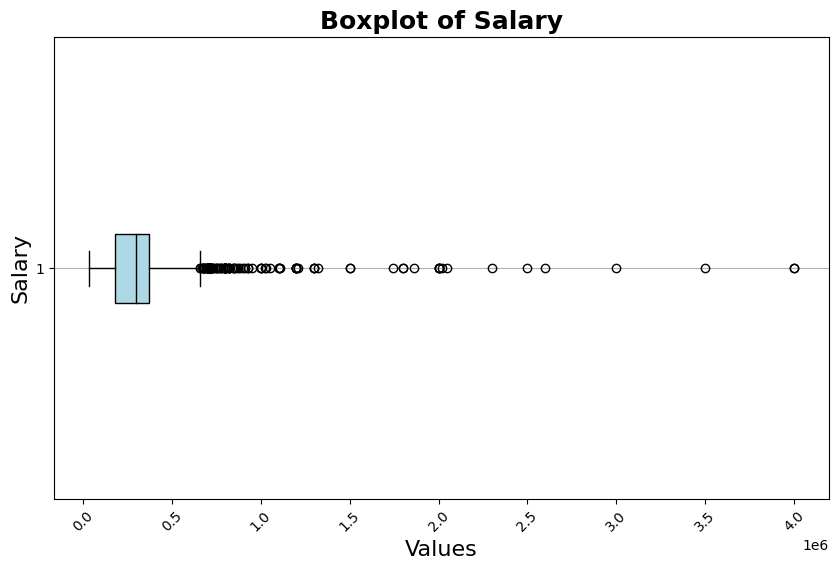

In [209]:
plt.figure(figsize=(10, 6))
plt.boxplot(train_df['Salary'], vert=False, patch_artist=True, boxprops={'facecolor': 'lightblue', 'edgecolor': 'black'}, whiskerprops={'color': 'black'}, flierprops={'color': 'black'}, capprops={'color': 'black'}, medianprops={'color': 'black'}, showfliers=True)
plt.title('Boxplot of Salary', fontsize=18, fontweight='bold')
plt.xlabel('Values', fontsize=16)
plt.ylabel('Salary', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

Salary > 10,00,000 is rare, especially in the first job. From the boxplot, this is also evident. We can remove the data points where Salary > 10,00,000 from the training dataset.


In [210]:
# Filter out rows where Salary > 10,00,000
train_df = train_df[train_df['Salary'] <= 1000000]

print("Shape of the training dataset after removing outliers:", train_df.shape)

Shape of the training dataset after removing outliers: (3962, 19)


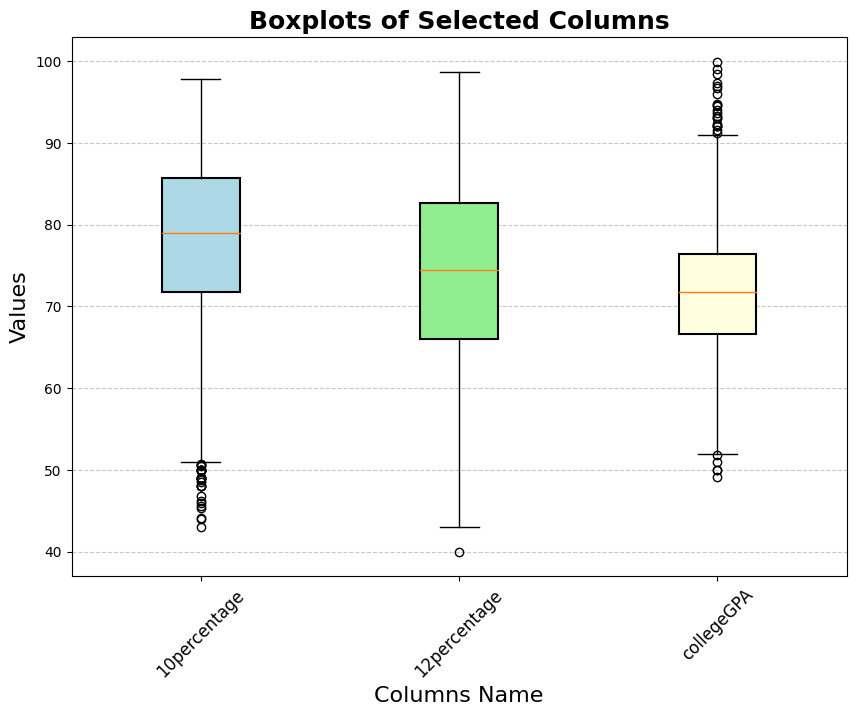

In [211]:
# Selecting columns for boxplots
columns_for_boxplot = ['10percentage', '12percentage', 'collegeGPA']

# Creating boxplots
fig, ax = plt.subplots(figsize=(10, 7))

# Create the boxplot
boxplot = ax.boxplot(train_df[columns_for_boxplot].values, patch_artist=True, labels=columns_for_boxplot)

# Customize the colors and line styles
colors = cycle(['lightblue', 'lightgreen', 'lightyellow', 'lightcoral', 'lightgrey'])
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

# Add title and axis labels
ax.set_title('Boxplots of Selected Columns', fontsize=18, fontweight='bold')
ax.set_xlabel('Columns Name', fontsize=16)
ax.set_ylabel('Values', fontsize=16)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, fontsize=12)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [212]:
# Filter out rows where 12percentage > 42
train_df = train_df[train_df['12percentage'] > 42]

# Filter out rows where collegeGPA > 53
train_df = train_df[train_df['collegeGPA'] > 53]

print("Shape of the training dataset after removing outliers:", train_df.shape)

Shape of the training dataset after removing outliers: (3948, 19)


#### **Data preprocessing**

Now, we will preprocess the data before feeding it to the model. We can't feed the categorical data directly to the model. We need to encode the categorical columns and scale the numerical columns. We will use the 'One Hot Encoding' and 'Label Encoding' to encode the categorical columns and 'Standard Scaler' to scale the numerical columns.

- 'Label Encoding' is used to encode the categorical columns by assigning a unique integer to each category. This technique is useful if the number of categories is less. If the number of categories is more, let's say 5 then we may use 0 to 4 to encode the categories. But the has some problem, though we assigned the integers randomly, the model may assume that the categories have some kind of order or hierarchy. To avoid this, we use 'OneHot Encoding'.
- 'One Hot Encoding' is used to encode the categorical columns by creating a separate column for each category and assigning 1 or 0 to the columns. This technique is useful if the number of categories is more.

We will use 'LabelEncoder' to encode the 'Gender' and pandas 'get_dummies' method to encode the 'Degree' and 'Specialization' columns in one hot encoding. We will use 'StandardScaler' to scale the numerical columns. All these encoders are available in the 'sklearn.preprocessing' module. import them and use them to preprocess the data.


**Train Dataset**

In [213]:
# Encode Gender using LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()
train_df['Gender_encoded'] = label_encoder.fit_transform(train_df['Gender'])
train_df.drop(['Gender'], axis=1, inplace=True)

# One-Hot Encoding for Degree and Specialization
train_df = pd.get_dummies(train_df, columns=['Degree', 'Specialization'], drop_first=True)

# Numerical columns for scaling
numerical_cols = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', '12GradAge', 'GradAge']
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

In [214]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3948 entries, 203097 to 324966
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3948 non-null   int64  
 1   10percentage           3948 non-null   float64
 2   12percentage           3948 non-null   float64
 3   collegeGPA             3948 non-null   float64
 4   English                3948 non-null   float64
 5   Logical                3948 non-null   float64
 6   Quant                  3948 non-null   float64
 7   Domain                 3948 non-null   float64
 8   conscientiousness      3948 non-null   float64
 9   agreeableness          3948 non-null   float64
 10  extraversion           3948 non-null   float64
 11  nueroticism            3948 non-null   float64
 12  openess_to_experience  3948 non-null   float64
 13  BirthYear              3948 non-null   int32  
 14  12GradAge              3948 non-null   float64
 15  Gr

**Test Dataset**

In [215]:
# Encode Gender using LabelEncoder
label_encoder = LabelEncoder()
scaler = StandardScaler()
test_df['Gender_encoded'] = label_encoder.fit_transform(test_df['Gender'])
test_df.drop(['Gender'], axis=1, inplace=True)

# One-Hot Encoding for Degree and Specialization
test_df = pd.get_dummies(test_df, columns=['Degree', 'Specialization'], drop_first=True)

# Numerical columns for scaling
numerical_cols = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', '12GradAge', 'GradAge']
test_df[numerical_cols] = scaler.fit_transform(test_df[numerical_cols])

#### **Feature Selection**

Now the dataset is ready for the model. But before that, we need to select the features that are important for the model. You can use the 'Correlation Matrix' to find the correlation between the features and the target variable and select the features that have a high correlation with the target variable.

There are other methods to select the features like 'SelectKBest', 'SelectPercentile', 'RFE', 'RFECV', etc. You can use any of these methods to select the features. See the documentation of the 'sklearn.feature_selection' module for more information.

[Note: Bonus credits will be given if you can report which features are the best predictors of the First job annual salary.]


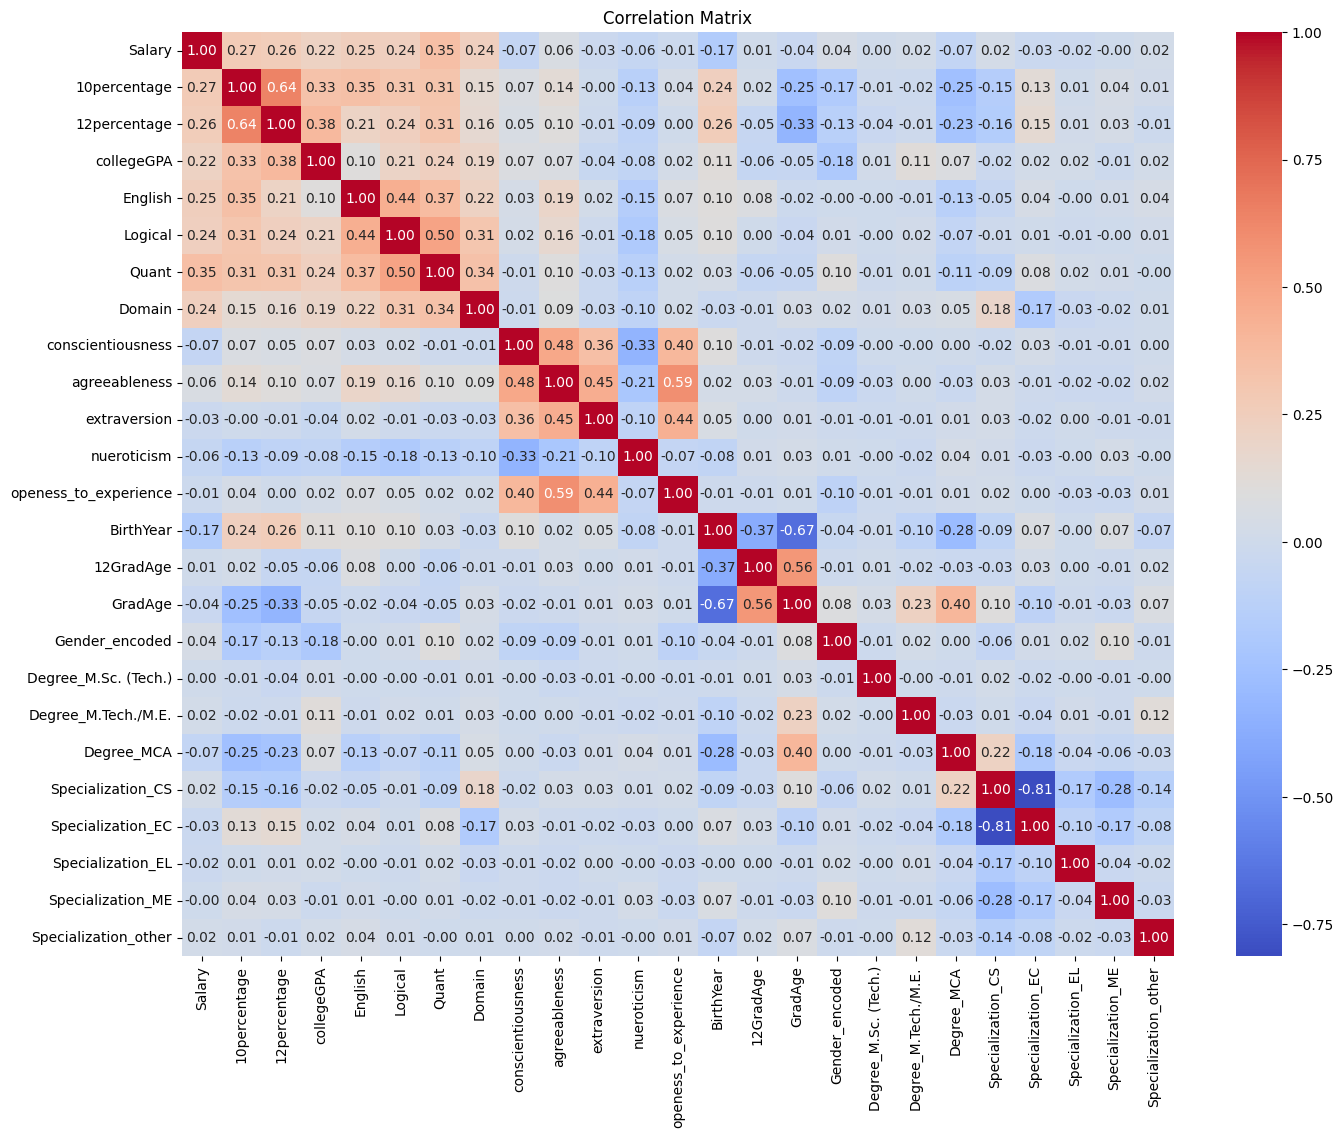

Top features based on ANOVA F-value:
                  Feature       Score
5                   Quant  551.933943
0            10percentage  316.614239
1            12percentage  287.401232
3                 English  261.320415
4                 Logical  245.638144
6                  Domain  236.162941
2              collegeGPA  199.570721
12              BirthYear  112.352491
18             Degree_MCA   20.616437
7       conscientiousness   17.272179
8           agreeableness   14.370545
10            nueroticism   13.021818
15         Gender_encoded    6.749781
14                GradAge    6.250424
20      Specialization_EC    3.996273
9            extraversion    2.656036
21      Specialization_EL    2.428337
19      Specialization_CS    2.327041
17    Degree_M.Tech./M.E.    1.721866
23   Specialization_other    1.538720
11  openess_to_experience    0.660628
13              12GradAge    0.186819
16   Degree_M.Sc. (Tech.)    0.064153
22      Specialization_ME    0.007005

Features wit

In [216]:
# Correlation matrix
corr_matrix = train_df.corr()

# Plot correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# SelectKBest with ANOVA F-value
X = train_df.drop(['Salary'], axis=1)
y = train_df['Salary']

# Top k features based on ANOVA F-value
k_best = SelectKBest(score_func=f_regression, k='all')
X_best = k_best.fit_transform(X, y)

# Scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': k_best.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("Top features based on ANOVA F-value:")
print(feature_scores)

# Best predictors based on correlation
corr_with_target = corr_matrix['Salary'].abs().sort_values(ascending=False)
print("\nFeatures with highest correlation with Salary:")
print(corr_with_target)

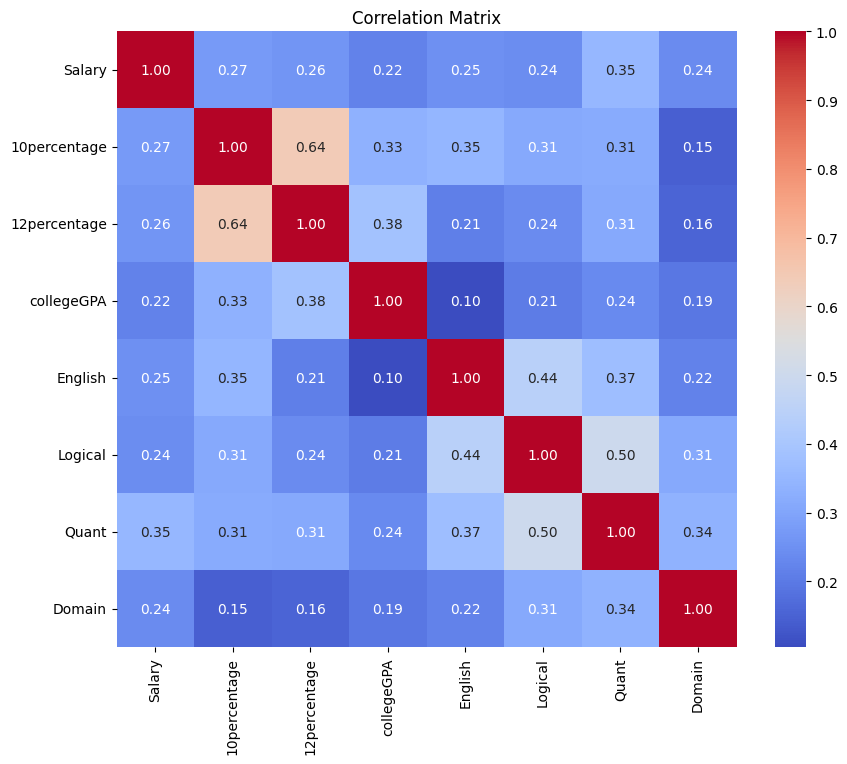

In [217]:
# Subset Correlation matrix for report
corr_matrix_subset = train_df.iloc[:, :8].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [218]:
strong_correlation_features = ['Quant', '10percentage', '12percentage', 'English', 'Logical', 'Domain', 'collegeGPA']
moderate_correlation_features = ['BirthYear', 'Degree_MCA', 'conscientiousness', 'agreeableness', 'nueroticism', 'GradAge', 'Gender_encoded']
all_selected_features = strong_correlation_features + moderate_correlation_features

X = train_df[strong_correlation_features]
y = train_df['Salary']

In [219]:
X_all = train_df[all_selected_features]
y_all = train_df['Salary']

In [220]:
X_test = test_df[strong_correlation_features]
X_all_test = test_df[all_selected_features]

#### **Split the data**

After selecting the features, split the data into training and validation sets using the 'train_test_split' method. Use 20% of the data for validation.


In [221]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (3158, 7)
y_train shape: (3158,)
X_val shape: (790, 7)
y_val shape: (790,)


In [222]:
X_all_train, X_all_val, y_all_train, y_all_val = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print("X_all_train shape:", X_all_train.shape)
print("y_all_train shape:", y_all_train.shape)
print("X_all_val shape:", X_all_val.shape)
print("y_all_val shape:", y_all_val.shape)

X_all_train shape: (3158, 14)
y_all_train shape: (3158,)
X_all_val shape: (790, 14)
y_all_val shape: (790,)


#### **Model Selection**

Now, we will select the model that best fits the data. You should try different models and select the one that gives the best performance. You can use the 'Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', etc. models to predict the salary.

You can use sklearn's 'cross_val_score' method to find the cross-validation score of multiple models and select the best model.


In [223]:
def evaluate_model(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"Model: {model.__class__.__name__}")
    print("Cross-Validation RMSE Scores:", rmse_scores)
    print("Mean RMSE:", rmse_scores.mean())
    print()

models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    XGBRegressor(random_state=42)
]

print('Lower RMSE indicates better performance.\n\n')

for model in models:
    evaluate_model(model, X_train, y_train)

Lower RMSE indicates better performance.


Model: LinearRegression
Cross-Validation RMSE Scores: [124269.60499286 126368.20784872 123672.22307133 129861.33696593
 133494.6335549 ]
Mean RMSE: 127533.2012867468

Model: DecisionTreeRegressor
Cross-Validation RMSE Scores: [184652.85596272 182493.28061152 185553.6105956  184396.36819151
 192598.89508992]
Mean RMSE: 185939.00209025355

Model: RandomForestRegressor
Cross-Validation RMSE Scores: [126781.49628646 129491.58852686 127662.3633148  133940.88789492
 137588.38899433]
Mean RMSE: 131092.94500347195

Model: XGBRegressor
Cross-Validation RMSE Scores: [132443.67128032 135238.5531325  137262.711947   140977.87056332
 142886.49321124]
Mean RMSE: 137761.86002687414



#### **Model Evaluation Using Strong Correlation Features**

After selecting the model, evaluate the model using the validation set. You can use 'mean_squared_error', 'mean_absolute_error', 'r2_score', etc. to evaluate the model.


In [236]:
# final_model = XGBRegressor(random_state=42)
final_model = LinearRegression()
# final_model = DecisionTreeRegressor(random_state=42)
# final_model = RandomForestRegressor(random_state=42)

final_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = final_model.predict(X_val)

In [237]:
X_val_results = pd.DataFrame({'Actual Value': y_val, 'Prediction': y_pred})

X_val_results

,Actual Value,Prediction
ID,,
1066112,180000,254484.423798
250796,575000,358927.841228
435389,240000,149936.568903
1089599,250000,292696.866652
1081706,570000,367368.320833
...,...,...
1233060,145000,325271.393053
661647,305000,187512.276483
1084321,525000,272397.433109


In [ ]:
# Display the feature importances; not applicable on linear regression

feature_importances = final_model.feature_importances_

importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values('Importance', ascending=False)

print(importances_df)

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, hue=importances_df['Feature'], dodge=False, palette='viridis', legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of RandomForestRegressor Model')
plt.tight_layout()
plt.show()

**MSE, MAE, and R2 Score**

In [239]:
# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")


Model Evaluation:
Mean Squared Error (MSE): 17346867018.33598
Mean Absolute Error (MAE): 98660.65556369703
R-squared (R2) Score: 0.18168831472530522


**Residual Plot**

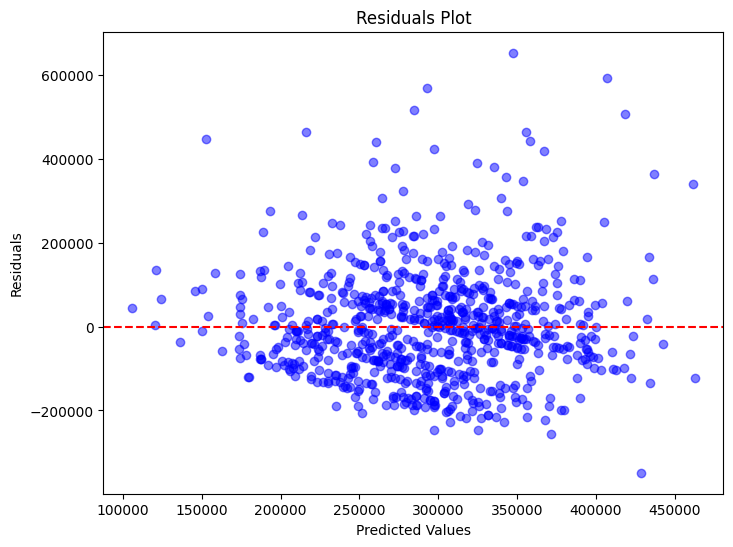

In [243]:
residuals = y_val - y_pred

# Plotting the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

**Actual vs. Predicted Values Plot**

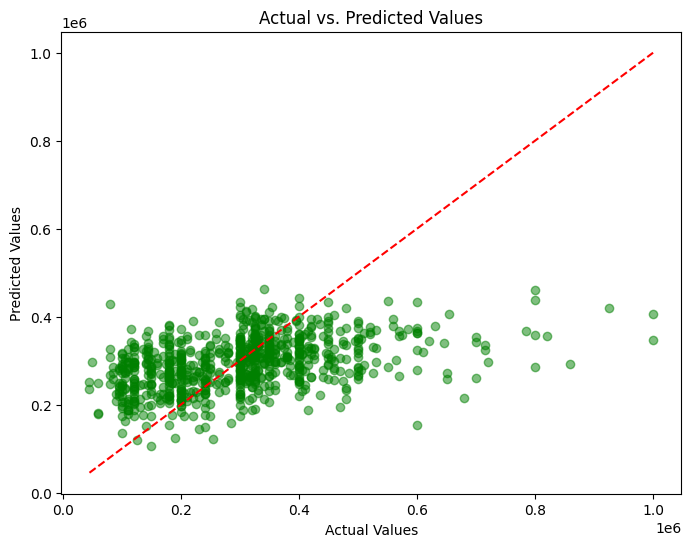

In [244]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, color='green', alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

####**Model Evaluation Using Strong and Moderately Correlated Features**

In [260]:
final_model = LinearRegression()
# final_model = XGBRegressor(random_state=42)
# final_model = DecisionTreeRegressor(random_state=42)
# final_model = RandomForestRegressor(random_state=42)

final_model.fit(X_all_train, y_all_train)

# Predict on the validation set
y_all_pred = final_model.predict(X_all_val)

In [261]:
X_all_val_results = pd.DataFrame({'Actual Value': y_all_val, 'Prediction': y_all_pred})

X_all_val_results

,Actual Value,Prediction
ID,,
1066112,180000,223191.446267
250796,575000,418450.345645
435389,240000,175096.162105
1089599,250000,285064.687943
1081706,570000,331949.146270
...,...,...
1233060,145000,316609.879745
661647,305000,174562.293083
1084321,525000,261392.684290


In [ ]:
# Display the feature importances; not applicable on linear regression

feature_importances = final_model.feature_importances_

importances_df = pd.DataFrame({'Feature': X_all_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values('Importance', ascending=False)

print(importances_df)

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, hue=importances_df['Feature'], dodge=False, palette='viridis', legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of RandomForestRegressor Model')
plt.tight_layout()
plt.show()

**MSE, MAE, and R2 Score**

In [262]:
# Evaluate the model
mse = mean_squared_error(y_all_val, y_all_pred)
mae = mean_absolute_error(y_all_val, y_all_pred)
r2 = r2_score(y_all_val, y_all_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

Model Evaluation:
Mean Squared Error (MSE): 15568039608.918962
Mean Absolute Error (MAE): 92666.99210598767
R-squared (R2) Score: 0.2656017530236575


**Residual Plot**

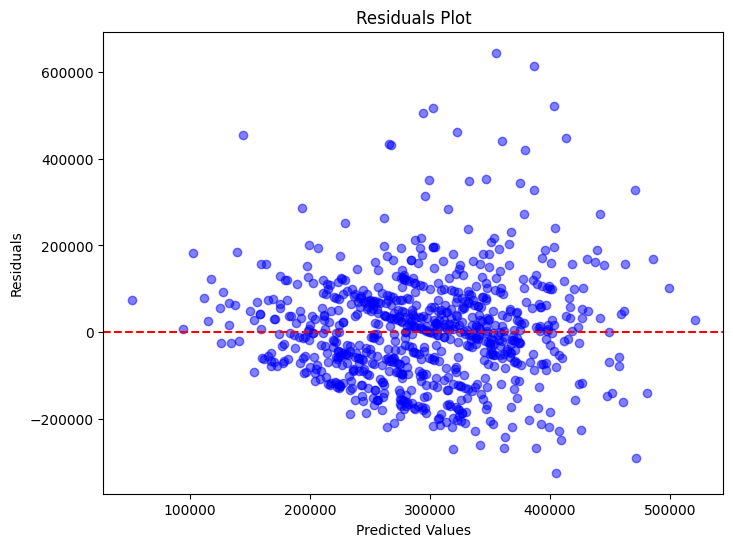

In [263]:
residuals = y_all_val - y_all_pred

# Plotting the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_all_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

**Actual vs. Predicted Values Plot**

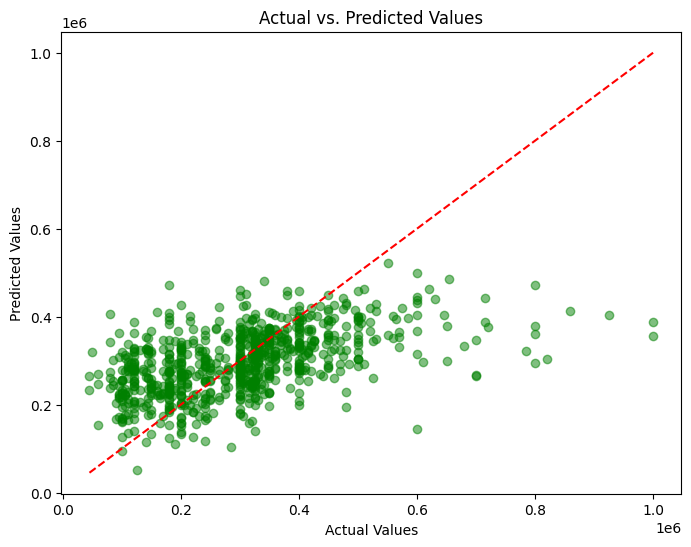

In [264]:
plt.figure(figsize=(8, 6))
plt.scatter(y_all_val, y_all_pred, color='green', alpha=0.5)
plt.plot([y_all_val.min(), y_all_val.max()], [y_all_val.min(), y_all_val.max()], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

#### **Model Prediction On Test Dataset**

In [121]:
test_pred = final_model.predict(X_all_test)

test_ids = X_test.index

test_results = pd.DataFrame({'ID': test_ids, 'Prediction': test_pred})

test_results

# True value is missing in test dataset so it's not possible to evaluate the result without the Salary.

,ID,Prediction
0,664736,288300.0
1,1123290,297650.0
2,1062444,423950.0
3,1072028,254000.0
4,267259,308950.0
...,...,...
1484,407755,341300.0
1485,575154,337150.0
1486,216598,397200.0
1487,919755,234050.0
